In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Find the absolute path of the project root 
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_dir = os.path.join(project_root, "data")  

# Load each year into a separate DataFrame
df_2022 = pd.read_csv(os.path.join(data_dir, "timeseries_2022.csv"))
df_2023 = pd.read_csv(os.path.join(data_dir, "timeseries_2023.csv"))
df_2024 = pd.read_csv(os.path.join(data_dir, "timeseries_2024.csv"))

# Display basic information for each year
print("2022 DataFrame Info:")
print(df_2022.info())

2022 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   plant_name       148506 non-null  object 
 1   psr_type         148506 non-null  object 
 2   start_time       148506 non-null  object 
 3   end_time         148506 non-null  object 
 4   position         148506 non-null  int64  
 5   Generation (MW)  148506 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.8+ MB
None

2023 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147862 entries, 0 to 147861
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   plant_name       147862 non-null  object 
 1   psr_type         147862 non-null  object 
 2   start_time       147862 non-null  object 
 3   end_time         147862 non-null  object 
 4   positio

In [9]:
print("\n2023 DataFrame Info:")
print(df_2023.info())


2023 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147862 entries, 0 to 147861
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   plant_name       147862 non-null  object 
 1   psr_type         147862 non-null  object 
 2   start_time       147862 non-null  object 
 3   end_time         147862 non-null  object 
 4   position         147862 non-null  int64  
 5   Generation (MW)  147862 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.8+ MB
None


In [8]:
print("\n2024 DataFrame Info:")
print(df_2024.info())


2024 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149978 entries, 0 to 149977
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   plant_name       149978 non-null  object 
 1   psr_type         149978 non-null  object 
 2   start_time       149978 non-null  object 
 3   end_time         149978 non-null  object 
 4   position         149978 non-null  int64  
 5   Generation (MW)  149978 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.9+ MB
None


In [45]:
# Select a plant name (pick one from the dataset)
# Select KREMASTA explicitly
selected_plant = "KREMASTA"

# Filter data for the selected plant
plant_2022 = df_2022[df_2022["plant_name"] == selected_plant]
plant_2023 = df_2023[df_2023["plant_name"] == selected_plant]
plant_2024 = df_2024[df_2024["plant_name"] == selected_plant]

In [46]:
# Create a new column 'date' with only the date part of 'start_time'
plant_2022["date"] = pd.to_datetime(plant_2022["start_time"]).dt.date
plant_2023["date"] = pd.to_datetime(plant_2023["start_time"]).dt.date
plant_2024["date"] = pd.to_datetime(plant_2024["start_time"]).dt.date

# Aggregate daily generation for each year
daily_2022 = plant_2022.groupby("date")["Generation (MW)"].sum()
daily_2023 = plant_2023.groupby("date")["Generation (MW)"].sum()
daily_2024 = plant_2024.groupby("date")["Generation (MW)"].sum()

# Remove the year from the date index to align different years on the same scale
daily_2022.index = pd.to_datetime(daily_2022.index).strftime("%m-%d")
daily_2023.index = pd.to_datetime(daily_2023.index).strftime("%m-%d")
daily_2024.index = pd.to_datetime(daily_2024.index).strftime("%m-%d")

# Sort indexes to ensure proper alignment
daily_2022 = daily_2022.sort_index()
daily_2023 = daily_2023.sort_index()
daily_2024 = daily_2024.sort_index()

C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_23112\1326033671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_2022["date"] = pd.to_datetime(plant_2022["start_time"]).dt.date
C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_23112\1326033671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_2023["date"] = pd.to_datetime(plant_2023["start_time"]).dt.date
C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_23112\1326033671.py:4: SettingWithCopyWarning: 
A value i

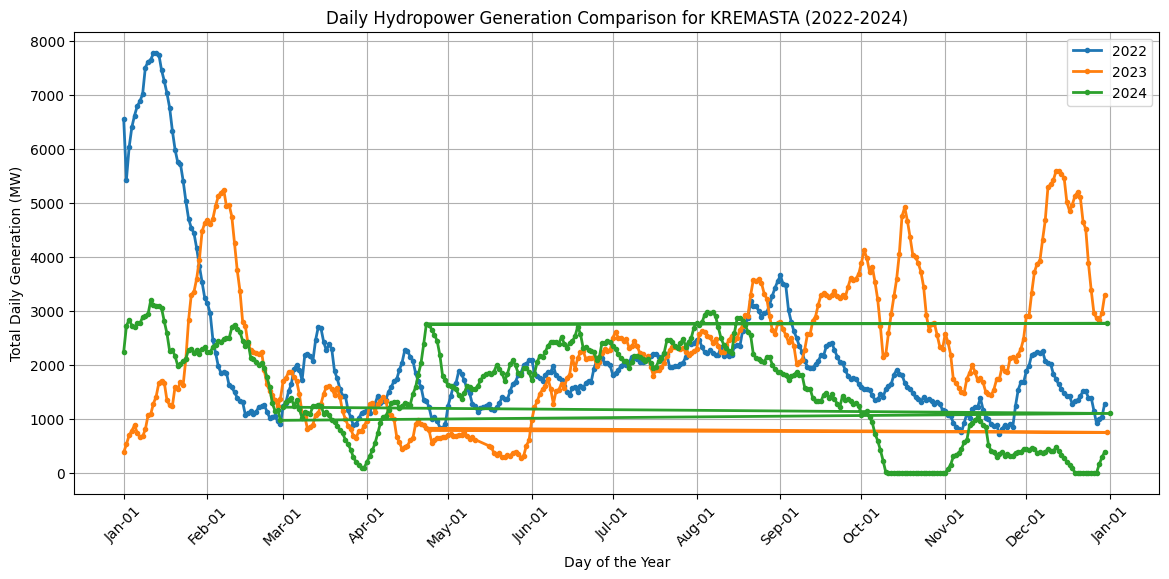

In [47]:
# Apply a 7-day rolling average to smooth fluctuations
daily_2022_smooth = daily_2022.rolling(window=7, min_periods=1).mean()
daily_2023_smooth = daily_2023.rolling(window=7, min_periods=1).mean()
daily_2024_smooth = daily_2024.rolling(window=7, min_periods=1).mean()

# Create a better comparative plot
plt.figure(figsize=(14, 6))
plt.plot(daily_2022_smooth.index, daily_2022_smooth.values, label="2022", linestyle="-", linewidth=2, marker=".")
plt.plot(daily_2023_smooth.index, daily_2023_smooth.values, label="2023", linestyle="-", linewidth=2, marker=".")
plt.plot(daily_2024_smooth.index, daily_2024_smooth.values, label="2024", linestyle="-", linewidth=2, marker=".")

# Formatting the x-axis
plt.xlabel("Day of the Year")
plt.ylabel("Total Daily Generation (MW)")
plt.title(f"Daily Hydropower Generation Comparison for {selected_plant} (2022-2024)")
plt.legend()

# Improve x-axis readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show only first day of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))  # Format as "Jan-01"

plt.grid(True)

# Show the improved plot
plt.show()